In [2]:
import pandas as pd

deaths_df = pd.ExcelFile('D:\Downloads\weekly state-wise death by covid19 and flu 2020.xls')
deaths_df = pd.read_excel(deaths_df,0,skiprows = 0)
deaths_df['State'].unique()

# deaths_df.fillna(0)

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'Puerto Rico'], dtype=object)

In [3]:
# deaths_df.info()
state_covid_deaths = deaths_df[deaths_df['State'].isin(['Washington'])][['COVID Deaths']].fillna(0).astype('int')
print(state_covid_deaths)
state_influenza_deaths = deaths_df[deaths_df['State'].isin(['Washington'])][['Influenza Deaths']].fillna(0).astype('int')
print(state_influenza_deaths)

     COVID Deaths
686             0
687             0
688             0
689             0
690             0
691            19
692            26
693            59
694           114
695           148
696           123
697            69
698            35
699            10
     Influenza Deaths
686                 0
687                 0
688                11
689                 0
690                 0
691                16
692                 0
693                16
694                 0
695                 0
696                 0
697                 0
698                 0
699                 0


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

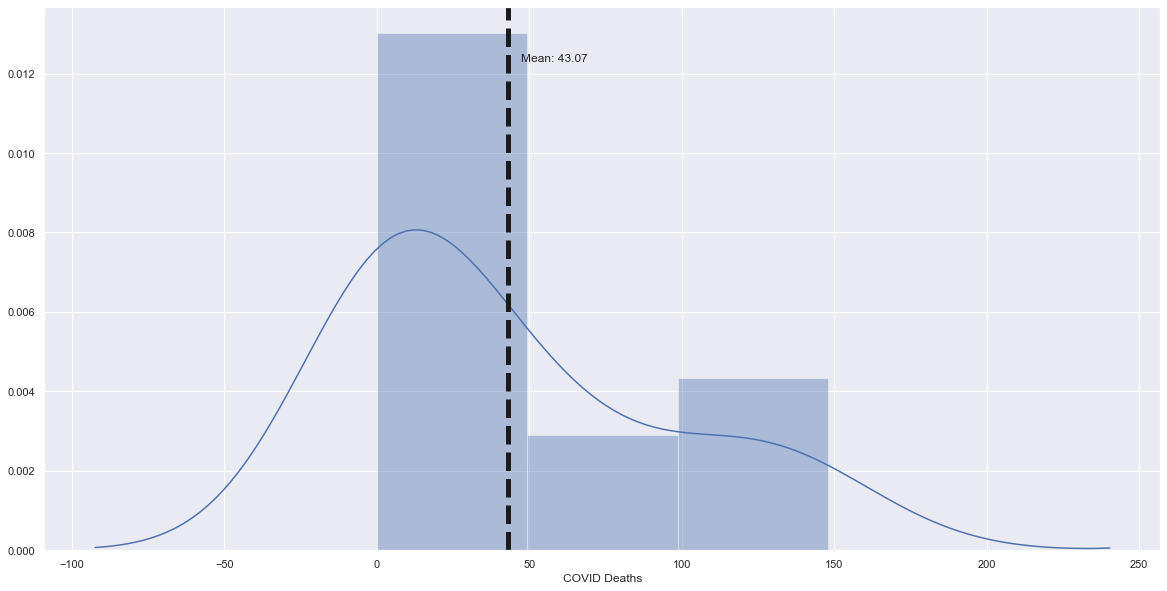

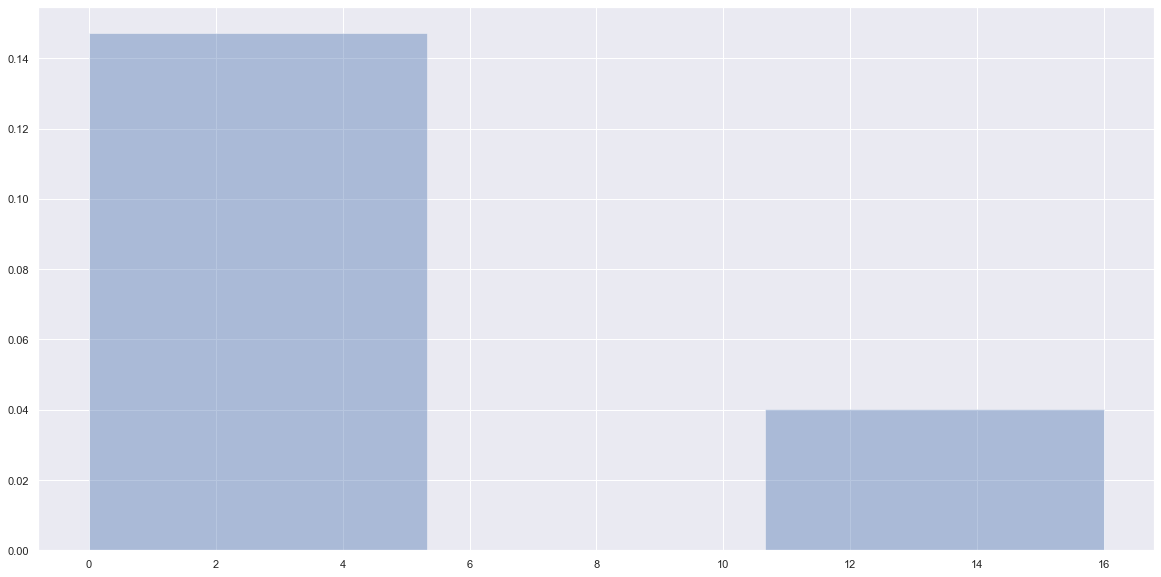

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from pylab import rcParams
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()

def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

plot_distribution(covid_deaths)
plot_distribution(influenza_deaths)

In [4]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')


sample_size = 14
covid_deaths= state_covid_deaths['COVID Deaths']
influenza_deaths = state_influenza_deaths['Influenza Deaths']
compare_2_groups(covid_deaths, influenza_deaths, 0.05, sample_size)        


Statistics=2.878, p=0.008
Different distributions (reject H0)
